# Get image from CSI camera
- Use GStreamer & OpenCV

In [1]:
# Check if OpenCV is built with GStreamer
import cv2

"""
Video I/O:
    FFMPEG:                      YES
      avcodec:                   YES (58.54.100)
      avformat:                  YES (58.29.100)
      avutil:                    YES (56.31.100)
      swscale:                   YES (5.5.100)
      avresample:                YES (4.0.0)
    GStreamer:                   YES (1.16.2)
"""

# If GStreamer: NO, then uninstall your OpenCV to load built-in OpenCV for Jetson
"""
    $ pip3 uninstall opencv-python
"""
print(cv2.getBuildInformation())


General configuration for OpenCV 4.5.4 =====================================
  Version control:               4.5.4-8-g3e4c170df4

  Platform:
    Timestamp:                   2022-01-18T10:01:01Z
    Host:                        Linux 5.10.65-tegra aarch64
    CMake:                       3.16.3
    CMake generator:             Unix Makefiles
    CMake build tool:            /usr/bin/make
    Configuration:               Release

  CPU/HW features:
    Baseline:                    NEON FP16

  C/C++:
    Built as dynamic libs?:      YES
    C++ standard:                11
    C++ Compiler:                /usr/bin/c++  (ver 9.3.0)
    C++ flags (Release):         -fsigned-char -W -Wall -Werror=return-type -Werror=non-virtual-dtor -Werror=address -Werror=sequence-point -Wformat -Werror=format-security -Wmissing-declarations -Wundef -Winit-self -Wpointer-arith -Wshadow -Wsign-promo -Wuninitialized -Wsuggest-override -Wno-delete-non-virtual-dtor -Wno-comment -Wimplicit-fallthrough=3 -Wno

In [2]:
sensor_id = 0
downscale = 2
width, height = (1280, 720)
_width, _height = (width // downscale, height // downscale)
frame_rate = 30

# 0: None
# 1: counterclockwise
# 2: rotate-180
# 3: clockwise
# 4: horizontal-flip
# 5: upper-right-diagonal
# 6: vertical-flip
# 7: upper-left-diagonal
flip_method = 2

contrast = 1
brightness = 0

gstreamer_pipeline = (
    "nvarguscamerasrc sensor-id=%d ! "
    "video/x-raw(memory:NVMM), width=(int)%d, height=(int)%d, framerate=(fraction)%d/1 ! "
    "nvvidconv flip-method=%d ! "
    "videobalance contrast=%.1f brightness=%.1f ! "
    "video/x-raw, width=(int)%d, height=(int)%d, format=(string)BGRx ! "
    "videoconvert ! "
    "video/x-raw, format=(string)BGR ! appsink"
    % (
        sensor_id,
        width,
        height,
        frame_rate,
        flip_method,
        contrast,
        brightness,
        _width,
        _height,
    )
)

In [3]:
import cv2

camera = cv2.VideoCapture(gstreamer_pipeline, cv2.CAP_GSTREAMER)
print("Is opened: {}".format(camera.isOpened()))

GST_ARGUS: Creating output stream
CONSUMER: Waiting until producer is connected...
GST_ARGUS: Available Sensor modes :
GST_ARGUS: 3280 x 2464 FR = 21.000000 fps Duration = 47619048 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 3280 x 1848 FR = 28.000001 fps Duration = 35714284 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1920 x 1080 FR = 29.999999 fps Duration = 33333334 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1640 x 1232 FR = 29.999999 fps Duration = 33333334 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1280 x 720 FR = 59.999999 fps Duration = 16666667 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: Running with following settings:
   Camera index = 0 
   Camera mode  = 4 
   Output Stream W = 1280 H = 7

[ WARN:0] global /home/ubuntu/build_opencv/opencv/modules/videoio/src/cap_gstreamer.cpp (1100) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


### Grab an image

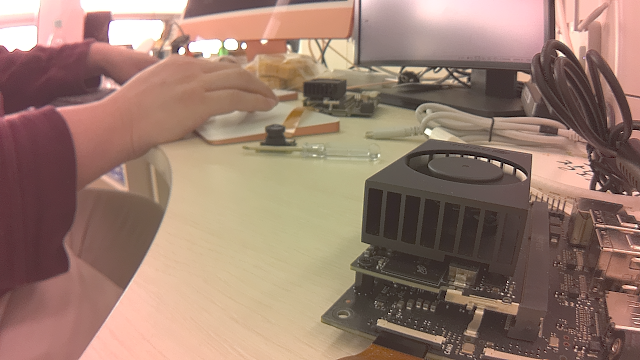

GST_ARGUS: Cleaning up
CONSUMER: Done Success
GST_ARGUS: Done Success


In [4]:
from PIL import Image

_, frame = camera.read()
display(Image.fromarray(frame[:,:,(2,1,0)]))
camera.release()